### Do the following on titanic dataset.

### 1. Load the dataset into python environment

In [1]:
#importing packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file
df=pd.read_csv(r'C:\Users\rakhi\Downloads\titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [3]:
df.set_index('PassengerId',inplace=True)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [5]:
df.shape

(891, 11)

There are 891 rows and 11 columns.

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 4. Fill in all the missing values present in all the columns in the dataset

In [10]:
missing_value=df.isna().sum()
missing_value

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age, Cabin, and Embarked has missing values.

In [11]:
#finding percentage of missing values
missing_value[missing_value>0]/len(df)*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

Since the column Cabin contains more than 77% missing values, we can drop the column

In [12]:
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
#finding the median of age column and replacing null values with median
med=df['Age'].median()
df['Age']=df['Age'].fillna(med)

In [14]:
#finding mode of embarked column and filling the missing values with mode
mod=df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(mod)

In [15]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

There are no more null values

#### 5. Check and handle outliers in at least 3 columns in the dataset

### Fare

<AxesSubplot:xlabel='Fare'>

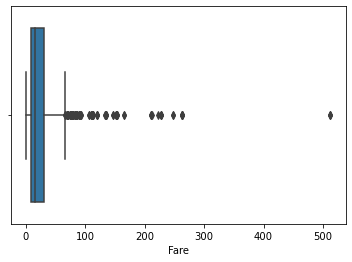

In [16]:
sns.boxplot(df['Fare'])

This shows 'Fare' has been rightly skewed, indicating the presence of outliers.

In [17]:
#finding inter quartile range
FQ1=df['Fare'].quantile(0.25)
FQ3=df['Fare'].quantile(0.75)
IQR=FQ3-FQ1

In [18]:
#finding upper limit
up_lim=FQ3+1.5*IQR

In [19]:
#removing values greater than upper limit
df['Fare']=np.where(df['Fare']>up_lim,up_lim,df['Fare'])

<AxesSubplot:xlabel='Fare'>

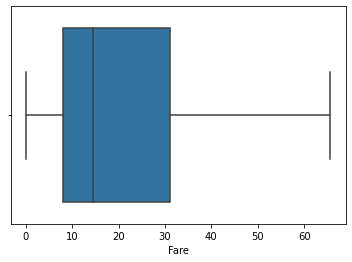

In [20]:
sns.boxplot(df['Fare'])

We can observe that there are no outliers.

### Age

<AxesSubplot:xlabel='Age'>

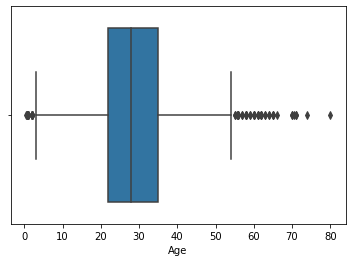

In [21]:
sns.boxplot(df['Age'])

There are outliers on both right and left side.

In [22]:
#finding interquartile range
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

In [23]:
#lower limit
low_lim=Q3-1.5*IQR
#upper limit
up_lim=Q3+1.5*IQR

In [24]:
#removing outliers
df['Age']=np.where(df['Age']<low_lim,low_lim,df['Age'])
df['Age']=np.where(df['Age']>up_lim,up_lim,df['Age'])

<AxesSubplot:xlabel='Age'>

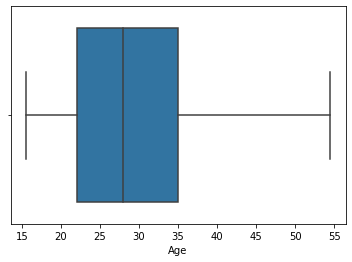

In [25]:
sns.boxplot(df['Age'])

We can observe that there are no outliers.

### SibSp

<AxesSubplot:xlabel='SibSp'>

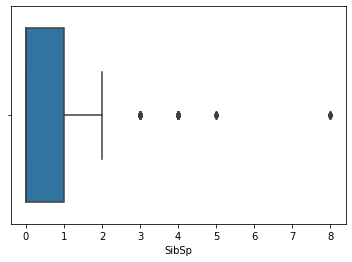

In [26]:
sns.boxplot(df['SibSp'])

These values are natural part of the dataset. So we dont need to treat it.

### Parch

<AxesSubplot:xlabel='Parch'>

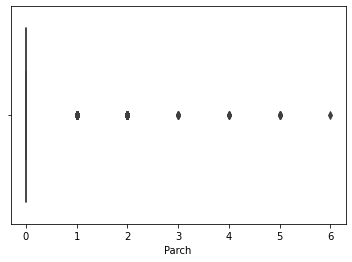

In [27]:
sns.boxplot(df['Parch'])

These values are natural part of the dataset. So we dont need to treat it.

#### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [28]:
#We can drop columns which are not contributing much to the model.
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a=["Sex","Embarked"]
for i in np.arange(len(a)):
    df[a[i]]= le.fit_transform(df[a[i]])

In [30]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [31]:
#Training the model with selected features
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred=lg.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_score(y_pred,y_test)

0.7877094972067039

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



##### Doing the MinMaxScaler.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaled= MinMaxScaler()
x=scaled.fit_transform(x)
x=pd.DataFrame(x)

In [37]:
#Running the model after scaling the data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lg.fit(x_train, y_train)
y_pred=lg.predict(x_test)

In [38]:
accuracy_score(y_pred,y_test)

0.7932960893854749

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



There is a slight increase in accuracy.